In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import thư viện

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import numpy as np
from tqdm import tqdm
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
import itertools
from keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, BackupAndRestore

# Đọc label file

In [3]:
label_data = pd.read_excel("/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/video_train.xlsx")
label_data.drop(['Unnamed: 0'], axis=1, inplace=True)
label_data = pd.DataFrame({"labels": label_data.columns})
label_data

,labels
0,Normal
1,Abnormal


# Data Preperation

In [ ]:
import cv2

def feature_extraction(video_path):
    width=60
    height=60
    sequence_length=8
    frames_list=[]
    #Read the Video
    video_reader = cv2.VideoCapture(video_path)
    #get the frame count
    frame_count=int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    #Calculate the interval after which frames will be added to the list
    skip_interval = max(int(frame_count/sequence_length), 1)
    #iterate through video frames
    for counter in range(sequence_length):
        #Set the current frame postion of the video
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, counter * skip_interval)
        #Read the current frame 
        ret, frame = video_reader.read()
        if not ret:
            break;
        #Convert to grayscale
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #Resize the image
        frame=cv2.resize(frame, (height, width))
        frame = frame/255
        #Append to the frame
        frames_list.append(frame)
    video_reader.release()
    #Return the Frames List
    return frames_list




In [ ]:
#Function for Feature Extraction
def feature_extraction(video_path):
    width=60
    height=60
    sequence_length=8
    frames_list=[]
    #Read the Video
    video_reader = cv2.VideoCapture(video_path)
    #get the frame count
    frame_count=int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    #Calculate the interval after which frames will be added to the list
    skip_interval = max(int(frame_count/sequence_length), 1)
    #iterate through video frames
    for counter in range(sequence_length):
        #Set the current frame postion of the video
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, counter * skip_interval)
        #Read the current frame 
        ret, frame = video_reader.read()
        if not ret:
            break;
        #Resize the image
        frame=cv2.resize(frame, (height, width))
        frame = frame/255
        #Append to the frame
        frames_list.append(frame)
    video_reader.release()
    #Return the Frames List
    return frames_list

In [ ]:
#Function for loading video files, Process and store in a data set
def load_video(datasets):
    global image
    label_index=0
    labels=[]
    images=[]
    #Iterate through each foler corresponding to category
    for folder in datasets:
        for file in tqdm(os.listdir(folder)):
            #Get the path name for each video
            video_path = os.path.join(folder, file)
            #Extract the frames of the current video
            frames_list = feature_extraction(video_path)
            images.append(frames_list)
            labels.append(label_index)
        label_index+=1
    return np.array(images, dtype='float16'), np.array(labels, dtype='int8')

In [ ]:
!unzip "/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/Zip/BiPS.zip"

## Train file

In [ ]:
train_path=[]
for label in label_data.labels.values:
    train_path.append('/content/content/BiPS/train/'+label+"/")

In [ ]:
train_images, train_labels = load_video(train_path)

100%|██████████| 1654/1654 [41:43<00:00,  1.51s/it]


## Validation file

In [ ]:
val_path=[]
for label in label_data.labels.values:
    val_path.append('/content/content/BiPS/val/'+label+"/")

In [ ]:
val_images, val_labels = load_video(val_path)

100%|██████████| 207/207 [05:12<00:00,  1.51s/it]


## Test file

In [ ]:
test_path=[]
for label in label_data.labels.values:
    test_path.append('/content/content/BiPS/test/'+label+"/")

In [ ]:
test_images, test_labels = load_video(test_path)

100%|██████████| 207/207 [05:15<00:00,  1.52s/it]


In [ ]:
# import numpy as np

# # save the features and labels arrays to disk
# np.save('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/train_images.npy', train_images)
# np.save('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/train_labels.npy', train_labels)

# np.save('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/val_images.npy', val_images)
# np.save('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/val_labels.npy', val_labels)

# np.save('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/test_images.npy', test_images)
# np.save('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/test_labels.npy', test_labels)

In [4]:
import numpy as np


train_images = np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/train_images.npy')
train_labels = np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/train_labels.npy')

val_images = np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/val_images.npy')
val_labels= np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/val_labels.npy')

test_images= np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/test_images.npy')
test_labels= np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 1 channel/test_labels.npy')

# print the shapes of the arrays to verify they were loaded correctly
print('features shape:', train_images.shape)
print('labels shape:', train_labels.shape)

features shape: (3414, 8, 60, 60)
labels shape: (3414,)


In [8]:
import numpy as np


train_images = np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 3 channel/train_images.npy')
train_labels = np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 3 channel/train_labels.npy')

val_images = np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 3 channel/val_images.npy')
val_labels= np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 3 channel/val_labels.npy')

test_images= np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 3 channel/test_images.npy')
test_labels= np.load('/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[1] Data/Data train model 2 label/numpy 3 channel/test_labels.npy')

# print the shapes of the arrays to verify they were loaded correctly
print('features shape:', train_images.shape)
print('labels shape:', train_labels.shape)

features shape: (3414, 10, 60, 60, 3)
labels shape: (3414,)


In [14]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv3D, MaxPooling3D, Dropout, Flatten, TimeDistributed

# Define the number of frames per video and the dimensions of each frame
num_frames = 10
frame_height = 60
frame_width = 60
num_channels = 3

# Define the CNN model

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(num_frames, frame_height, frame_width, num_channels), padding='same'))
cnn_model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))
cnn_model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))
cnn_model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))
cnn_model.add(Conv3D(256, kernel_size=(3, 3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling3D(pool_size=(2, 2, 2), padding='same'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(256, dropout=0.5, recurrent_dropout=0.5, input_shape=(num_frames, frame_height*frame_width*num_channels)))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.2))


# Define the random forest model
rd_model = RandomForestClassifier()

# Train the combined model
X_train = train_images # training data in shape (num_samples, num_frames, frame_height, frame_width, num_channels)
y_train = train_labels # training labels in shape (num_samples, num_classes)
#X_train_combined = combined_model.predict(train_images)
X_train_cnn = cnn_model.predict(X_train)
X_train_lstm = lstm_model.predict(X_train.reshape((-1, num_frames, frame_height*frame_width*num_channels)))
X_train_combined = np.hstack([X_train_cnn, X_train_lstm])
rd_model.fit(X_train_combined, y_train)

# Evaluate the model


ValueError: ignored

In [11]:
# Evaluate the model
X_test = test_images # test data in shape (num_samples, num_frames, frame_height, frame_width, num_channels)
y_test = test_labels # test labels in shape (num_samples, num_classes)
X_test_cnn = cnn_model.predict(X_test)
X_test_lstm = lstm_model.predict(X_test.reshape((-1, num_frames, frame_height*frame_width*num_channels)))
X_test_combined = np.hstack([X_test_cnn, X_test_lstm])
#accuracy = svm_model.score(X_test_combined, y_test)

y_pred = rd_model.predict(X_test_combined)

14/14 [==============================] - 0s 14ms/step


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.7466    0.7500    0.7483       220
           1     0.7330    0.7295    0.7312       207

    accuracy                         0.7400       427
   macro avg     0.7398    0.7397    0.7398       427
weighted avg     0.7400    0.7400    0.7400       427



In [15]:
rd_model = RandomForestClassifier()

# Flatten the video data and train the SVM model
X_train_flat = X_train.reshape((-1, num_frames*frame_height*frame_width*num_channels))
rd_model.fit(X_train_flat, y_train)

# Flatten the video data and test the SVM model
X_test_flat = X_test.reshape((-1, num_frames*frame_height*frame_width*num_channels))
y_pred = rd_model.predict(X_test_flat)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7517564402810304


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.7522    0.7727    0.7623       220
           1     0.7512    0.7295    0.7402       207

    accuracy                         0.7518       427
   macro avg     0.7517    0.7511    0.7513       427
weighted avg     0.7517    0.7518    0.7516       427



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, TimeDistributed
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import LSTM

model = Sequential()

# Convolutional layers
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'), input_shape=(None, 60, 60, 1)))
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.25)))

# Flatten the output of convolutional layers
model.add(TimeDistributed(Flatten()))

# LSTM layer
model.add(LSTM(128, return_sequences=False, dropout=0.5))

# Output layer
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_65 (TimeDi  (None, None, 60, 60, 32)  320      
 stributed)                                                      
                                                                 
 time_distributed_66 (TimeDi  (None, None, 58, 58, 32)  9248     
 stributed)                                                      
                                                                 
 time_distributed_67 (TimeDi  (None, None, 29, 29, 32)  0        
 stributed)                                                      
                                                                 
 time_distributed_68 (TimeDi  (None, None, 29, 29, 32)  0        
 stributed)                                                      
                                                                 
 time_distributed_69 (TimeDi  (None, None, 29, 29, 64

In [ ]:
# model = Sequential()

# model.add(BatchNormalization(momentum=0.8, input_shape=(train_images.shape[1],train_images.shape[2], train_images.shape[3], 3)))
# model.add(ConvLSTM2D(filters = 16, kernel_size=(3,3), activation='LeakyReLU', data_format='channels_last', return_sequences=True, recurrent_dropout=0.2))
# model.add(MaxPooling3D(pool_size=(1,2,2), padding='same', data_format='channels_last'))
# model.add(TimeDistributed(Dropout(0.2)))

# model.add(ConvLSTM2D(filters = 16, kernel_size=(3,3), activation='LeakyReLU', data_format='channels_last', return_sequences=True, recurrent_dropout=0.2))
# model.add(BatchNormalization(momentum=0.8))
# model.add(MaxPooling3D(pool_size=(1,2,2), padding='same', data_format='channels_last'))
# model.add(TimeDistributed(Dropout(0.2)))

# model.add(ConvLSTM2D(filters = 16, kernel_size=(3,3), activation='LeakyReLU', data_format='channels_last', return_sequences=True, recurrent_dropout=0.2))
# model.add(BatchNormalization(momentum=0.8))
# model.add(MaxPooling3D(pool_size=(1,2,2), padding='same', data_format='channels_last'))
# model.add(TimeDistributed(Dropout(0.3)))

# model.add(ConvLSTM2D(filters = 16, kernel_size=(3,3), activation='LeakyReLU', data_format='channels_last', return_sequences=True, recurrent_dropout=0.2))
# model.add(BatchNormalization(momentum=0.8))
# model.add(MaxPooling3D(pool_size=(1,2,2), padding='same', data_format='channels_last'))
# model.add(TimeDistributed(Dropout(0.3)))

# model.add(Flatten())

# model.add(Dense(4096,activation="relu"))
    
# model.add(Dense(8, activation='softmax'))
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 10, 60, 60, 3)    12        
 hNormalization)                                                 
                                                                 
 conv_lstm2d_4 (ConvLSTM2D)  (None, 10, 58, 58, 16)    11008     
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 10, 29, 29, 16)   0         
 3D)                                                             
                                                                 
 time_distributed_4 (TimeDis  (None, 10, 29, 29, 16)   0         
 tributed)                                                       
                                                                 
 conv_lstm2d_5 (ConvLSTM2D)  (None, 10, 27, 27, 16)    18496     
                                                      

In [ ]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
checkpoint_filepath = "/content/drive/MyDrive/Đồ án DS201 - Deep Learning/[3] Model/VGG16"
#es = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)
cb = ModelCheckpoint(checkpoint_filepath, monitor='val_loss')
#cb = BackupAndRestore(checkpoint_filepath, save_freq="epoch", delete_checkpoint=True)
history = model.fit(train_images, to_categorical(train_labels), batch_size=32, epochs=50, validation_data=(val_images, to_categorical(val_labels)), callbacks=[cb])

Epoch 1/50
107/107 [==============================] - ETA: 0s - loss: 0.5878 - accuracy: 0.6930

107/107 [==============================] - 18s 160ms/step - loss: 0.5878 - accuracy: 0.6930 - val_loss: 0.5901 - val_accuracy: 0.6792
Epoch 2/50
107/107 [==============================] - ETA: 0s - loss: 0.5577 - accuracy: 0.7080

107/107 [==============================] - 16s 147ms/step - loss: 0.5577 - accuracy: 0.7080 - val_loss: 0.5729 - val_accuracy: 0.7096
Epoch 3/50
106/107 [============================>.] - ETA: 0s - loss: 0.5465 - accuracy: 0.7120

107/107 [==============================] - 17s 156ms/step - loss: 0.5458 - accuracy: 0.7124 - val_loss: 0.5702 - val_accuracy: 0.7026
Epoch 4/50
106/107 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.7282

107/107 [==============================] - 17s 158ms/step - loss: 0.5340 - accuracy: 0.7279 - val_loss: 0.5601 - val_accuracy: 0.7119
Epoch 5/50
107/107 [==============================] - ETA: 0s - loss: 0.5200 - accuracy: 0.7343

107/107 [==============================] - 16s 155ms/step - loss: 0.5200 - accuracy: 0.7343 - val_loss: 0.5581 - val_accuracy: 0.7213
Epoch 6/50
107/107 [==============================] - ETA: 0s - loss: 0.5076 - accuracy: 0.7490

107/107 [==============================] - 17s 160ms/step - loss: 0.5076 - accuracy: 0.7490 - val_loss: 0.5444 - val_accuracy: 0.7424
Epoch 7/50
106/107 [============================>.] - ETA: 0s - loss: 0.4978 - accuracy: 0.7529

107/107 [==============================] - 16s 154ms/step - loss: 0.4983 - accuracy: 0.7528 - val_loss: 0.5613 - val_accuracy: 0.7096
Epoch 8/50
106/107 [============================>.] - ETA: 0s - loss: 0.4856 - accuracy: 0.7677

107/107 [==============================] - 17s 156ms/step - loss: 0.4856 - accuracy: 0.7671 - val_loss: 0.5511 - val_accuracy: 0.7330
Epoch 9/50
107/107 [==============================] - ETA: 0s - loss: 0.4649 - accuracy: 0.7753

107/107 [==============================] - 18s 169ms/step - loss: 0.4649 - accuracy: 0.7753 - val_loss: 0.5488 - val_accuracy: 0.7213
Epoch 10/50
107/107 [==============================] - ETA: 0s - loss: 0.4499 - accuracy: 0.7812

107/107 [==============================] - 16s 154ms/step - loss: 0.4499 - accuracy: 0.7812 - val_loss: 0.5407 - val_accuracy: 0.7213
Epoch 11/50
106/107 [============================>.] - ETA: 0s - loss: 0.4365 - accuracy: 0.7948

107/107 [==============================] - 16s 148ms/step - loss: 0.4371 - accuracy: 0.7941 - val_loss: 0.5457 - val_accuracy: 0.7213
Epoch 12/50
107/107 [==============================] - ETA: 0s - loss: 0.4171 - accuracy: 0.8032

107/107 [==============================] - 17s 156ms/step - loss: 0.4171 - accuracy: 0.8032 - val_loss: 0.5556 - val_accuracy: 0.7166
Epoch 13/50
106/107 [============================>.] - ETA: 0s - loss: 0.4000 - accuracy: 0.8131

107/107 [==============================] - 18s 164ms/step - loss: 0.3999 - accuracy: 0.8125 - val_loss: 0.5381 - val_accuracy: 0.7237
Epoch 14/50
107/107 [==============================] - ETA: 0s - loss: 0.3839 - accuracy: 0.8284

107/107 [==============================] - 17s 155ms/step - loss: 0.3839 - accuracy: 0.8284 - val_loss: 0.5520 - val_accuracy: 0.7283
Epoch 15/50
106/107 [============================>.] - ETA: 0s - loss: 0.3610 - accuracy: 0.8387

107/107 [==============================] - 16s 148ms/step - loss: 0.3611 - accuracy: 0.8383 - val_loss: 0.5596 - val_accuracy: 0.7096
Epoch 16/50
106/107 [============================>.] - ETA: 0s - loss: 0.3480 - accuracy: 0.8494

107/107 [==============================] - 16s 154ms/step - loss: 0.3482 - accuracy: 0.8492 - val_loss: 0.5726 - val_accuracy: 0.7002
Epoch 17/50
107/107 [==============================] - ETA: 0s - loss: 0.3186 - accuracy: 0.8635

107/107 [==============================] - 17s 157ms/step - loss: 0.3186 - accuracy: 0.8635 - val_loss: 0.5780 - val_accuracy: 0.7143
Epoch 18/50
106/107 [============================>.] - ETA: 0s - loss: 0.2982 - accuracy: 0.8723

107/107 [==============================] - 18s 170ms/step - loss: 0.2984 - accuracy: 0.8723 - val_loss: 0.5864 - val_accuracy: 0.7283
Epoch 19/50
107/107 [==============================] - ETA: 0s - loss: 0.2777 - accuracy: 0.8796

107/107 [==============================] - 16s 148ms/step - loss: 0.2777 - accuracy: 0.8796 - val_loss: 0.6203 - val_accuracy: 0.7190
Epoch 20/50
106/107 [============================>.] - ETA: 0s - loss: 0.2596 - accuracy: 0.8889

107/107 [==============================] - 16s 147ms/step - loss: 0.2595 - accuracy: 0.8890 - val_loss: 0.6259 - val_accuracy: 0.7237
Epoch 21/50
107/107 [==============================] - ETA: 0s - loss: 0.2511 - accuracy: 0.8943

107/107 [==============================] - 17s 159ms/step - loss: 0.2511 - accuracy: 0.8943 - val_loss: 0.6191 - val_accuracy: 0.7330
Epoch 22/50
107/107 [==============================] - ETA: 0s - loss: 0.2251 - accuracy: 0.9042

107/107 [==============================] - 17s 160ms/step - loss: 0.2251 - accuracy: 0.9042 - val_loss: 0.6609 - val_accuracy: 0.7143
Epoch 23/50
107/107 [==============================] - ETA: 0s - loss: 0.2157 - accuracy: 0.9153

107/107 [==============================] - 18s 173ms/step - loss: 0.2157 - accuracy: 0.9153 - val_loss: 0.6467 - val_accuracy: 0.7260
Epoch 24/50
106/107 [============================>.] - ETA: 0s - loss: 0.1991 - accuracy: 0.9192

107/107 [==============================] - 16s 155ms/step - loss: 0.2000 - accuracy: 0.9189 - val_loss: 0.7343 - val_accuracy: 0.7026
Epoch 25/50
107/107 [==============================] - ETA: 0s - loss: 0.1884 - accuracy: 0.9247

107/107 [==============================] - 17s 160ms/step - loss: 0.1884 - accuracy: 0.9247 - val_loss: 0.7073 - val_accuracy: 0.7400
Epoch 26/50
106/107 [============================>.] - ETA: 0s - loss: 0.1659 - accuracy: 0.9319

107/107 [==============================] - 17s 158ms/step - loss: 0.1657 - accuracy: 0.9323 - val_loss: 0.7865 - val_accuracy: 0.7119
Epoch 27/50
107/107 [==============================] - ETA: 0s - loss: 0.1578 - accuracy: 0.9385

107/107 [==============================] - 16s 147ms/step - loss: 0.1578 - accuracy: 0.9385 - val_loss: 0.8205 - val_accuracy: 0.7002
Epoch 28/50
106/107 [============================>.] - ETA: 0s - loss: 0.1561 - accuracy: 0.9402

107/107 [==============================] - 16s 151ms/step - loss: 0.1559 - accuracy: 0.9402 - val_loss: 0.7705 - val_accuracy: 0.7119
Epoch 29/50
106/107 [============================>.] - ETA: 0s - loss: 0.1373 - accuracy: 0.9478

107/107 [==============================] - 18s 173ms/step - loss: 0.1373 - accuracy: 0.9482 - val_loss: 0.8171 - val_accuracy: 0.7190
Epoch 30/50
106/107 [============================>.] - ETA: 0s - loss: 0.1297 - accuracy: 0.9460

107/107 [==============================] - 17s 156ms/step - loss: 0.1296 - accuracy: 0.9461 - val_loss: 0.7653 - val_accuracy: 0.7119
Epoch 31/50
107/107 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9543

107/107 [==============================] - 16s 151ms/step - loss: 0.1205 - accuracy: 0.9543 - val_loss: 0.8072 - val_accuracy: 0.7166
Epoch 32/50
107/107 [==============================] - ETA: 0s - loss: 0.1139 - accuracy: 0.9572

107/107 [==============================] - 16s 151ms/step - loss: 0.1139 - accuracy: 0.9572 - val_loss: 0.8186 - val_accuracy: 0.7096
Epoch 33/50
106/107 [============================>.] - ETA: 0s - loss: 0.1075 - accuracy: 0.9599

107/107 [==============================] - 17s 160ms/step - loss: 0.1073 - accuracy: 0.9602 - val_loss: 0.8087 - val_accuracy: 0.7283
Epoch 34/50
106/107 [============================>.] - ETA: 0s - loss: 0.1046 - accuracy: 0.9552

107/107 [==============================] - 17s 160ms/step - loss: 0.1052 - accuracy: 0.9549 - val_loss: 0.8863 - val_accuracy: 0.7237
Epoch 35/50
107/107 [==============================] - ETA: 0s - loss: 0.1004 - accuracy: 0.9640

107/107 [==============================] - 17s 155ms/step - loss: 0.1004 - accuracy: 0.9640 - val_loss: 0.9410 - val_accuracy: 0.7190
Epoch 36/50
107/107 [==============================] - ETA: 0s - loss: 0.0822 - accuracy: 0.9675

107/107 [==============================] - 16s 148ms/step - loss: 0.0822 - accuracy: 0.9675 - val_loss: 0.9350 - val_accuracy: 0.7213
Epoch 37/50
106/107 [============================>.] - ETA: 0s - loss: 0.0769 - accuracy: 0.9717

107/107 [==============================] - 20s 184ms/step - loss: 0.0767 - accuracy: 0.9719 - val_loss: 1.0978 - val_accuracy: 0.7213
Epoch 38/50
106/107 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.9714

107/107 [==============================] - 17s 161ms/step - loss: 0.0775 - accuracy: 0.9713 - val_loss: 0.9303 - val_accuracy: 0.7213
Epoch 39/50
107/107 [==============================] - ETA: 0s - loss: 0.0773 - accuracy: 0.9722

107/107 [==============================] - 16s 152ms/step - loss: 0.0773 - accuracy: 0.9722 - val_loss: 0.9840 - val_accuracy: 0.7049
Epoch 40/50
107/107 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.9728

107/107 [==============================] - 16s 151ms/step - loss: 0.0704 - accuracy: 0.9728 - val_loss: 0.9564 - val_accuracy: 0.7260
Epoch 41/50
106/107 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.9696

107/107 [==============================] - 17s 161ms/step - loss: 0.0770 - accuracy: 0.9698 - val_loss: 0.9861 - val_accuracy: 0.7073
Epoch 42/50
107/107 [==============================] - ETA: 0s - loss: 0.0664 - accuracy: 0.9731

107/107 [==============================] - 17s 160ms/step - loss: 0.0664 - accuracy: 0.9731 - val_loss: 1.1418 - val_accuracy: 0.7143
Epoch 43/50
107/107 [==============================] - ETA: 0s - loss: 0.0602 - accuracy: 0.9813

107/107 [==============================] - 17s 155ms/step - loss: 0.0602 - accuracy: 0.9813 - val_loss: 1.1898 - val_accuracy: 0.7166
Epoch 44/50
107/107 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9742

107/107 [==============================] - 16s 148ms/step - loss: 0.0639 - accuracy: 0.9742 - val_loss: 1.1621 - val_accuracy: 0.7307
Epoch 45/50
106/107 [============================>.] - ETA: 0s - loss: 0.0611 - accuracy: 0.9782

107/107 [==============================] - 16s 151ms/step - loss: 0.0616 - accuracy: 0.9777 - val_loss: 1.1270 - val_accuracy: 0.7002
Epoch 46/50
106/107 [============================>.] - ETA: 0s - loss: 0.0492 - accuracy: 0.9811

107/107 [==============================] - 20s 191ms/step - loss: 0.0494 - accuracy: 0.9810 - val_loss: 1.0950 - val_accuracy: 0.7354
Epoch 47/50
107/107 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9786

107/107 [==============================] - 16s 155ms/step - loss: 0.0551 - accuracy: 0.9786 - val_loss: 1.2339 - val_accuracy: 0.7213
Epoch 48/50
106/107 [============================>.] - ETA: 0s - loss: 0.0487 - accuracy: 0.9832

107/107 [==============================] - 16s 152ms/step - loss: 0.0493 - accuracy: 0.9827 - val_loss: 1.2077 - val_accuracy: 0.7354
Epoch 49/50
106/107 [============================>.] - ETA: 0s - loss: 0.0513 - accuracy: 0.9788

107/107 [==============================] - 17s 164ms/step - loss: 0.0511 - accuracy: 0.9789 - val_loss: 1.1680 - val_accuracy: 0.7166
Epoch 50/50
107/107 [==============================] - ETA: 0s - loss: 0.0465 - accuracy: 0.9821

107/107 [==============================] - 17s 159ms/step - loss: 0.0465 - accuracy: 0.9821 - val_loss: 1.2274 - val_accuracy: 0.7143


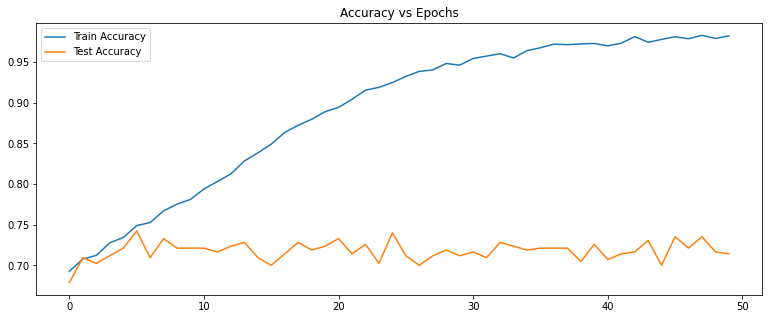

In [ ]:
#Plot the graph to check training and testing accuracy over the period of time
plt.figure(figsize=(13,5))
plt.title("Accuracy vs Epochs")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
y_pred = model.predict(test_images)
predicted_classes=[]
for i in range(len(test_labels)):
    predicted_classes.append(np.argmax(y_pred[i]))

14/14 [==============================] - 1s 41ms/step


In [ ]:
accuracy_score(test_labels, predicted_classes)

0.7540983606557377

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_classes,digits=4))

              precision    recall  f1-score   support

           0     0.7650    0.7545    0.7597       220
           1     0.7429    0.7536    0.7482       207

    accuracy                         0.7541       427
   macro avg     0.7539    0.7541    0.7540       427
weighted avg     0.7543    0.7541    0.7541       427



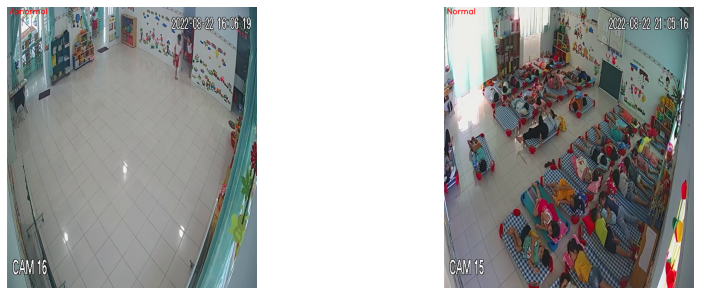

In [ ]:
import random

# Create a Matplotlib figure
plt.figure(figsize = (30, 30))
 
# Get Names of all classes in UCF101
all_classes_names = label_data.labels.values
 
# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)), 2)
 
# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):
 
    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]
 
    # Getting a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'/content/content/BiPS/test/{selected_class_Name}')
 
    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)
 
    # Reading the Video File Using the Video Capture
    video_reader = cv2.VideoCapture(f'/content/content/BiPS/test/{selected_class_Name}/{selected_video_file_name}')
     
    # Reading The First Frame of the Video File
    _, bgr_frame = video_reader.read()
 
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()
 
    # Converting the BGR Frame to RGB Frame 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
 
    # Adding The Class Name Text on top of the Video Frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
     
    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

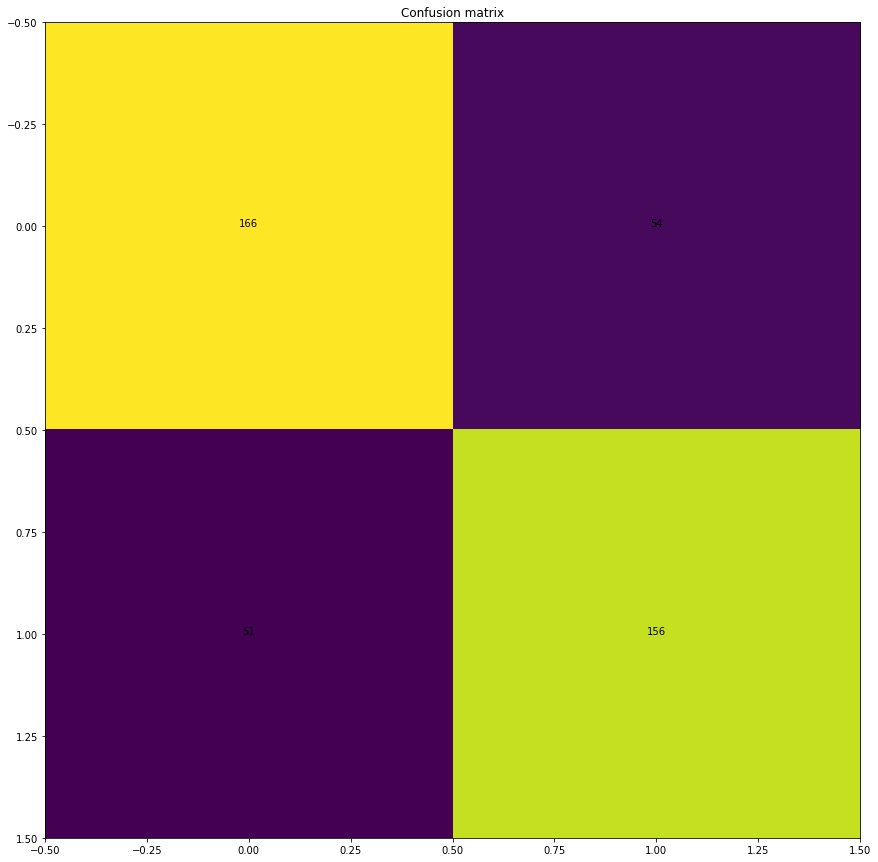

In [ ]:
#Confusion Matrix
plt.figure(figsize=(15,15))
plt.title("Confusion matrix")
cm=confusion_matrix(test_labels, predicted_classes)
plt.imshow(cm)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center")
plt.show()